In [1]:
#% pip install openpyxl
import os, re
import pandas as pd
from globals import glob
from utilities_database import prepare_data, prepare_database, consult_database, clear_databases, retrieve_data, rename_index, get_date, get_sigma
from utilities_analysis import mean_calculator, limits_gen, ini_generator_personalized, RyR, z_score_filter, plot_capability, reset_df
from utilities_plotting import plot_scatter

Database *input.db* found in: c:\Users\luciano.galan\Desktop\Code\Python_Eiit_RyR\a2_RyR_Analyser\database\input.db
Database *output.db* found in: c:\Users\luciano.galan\Desktop\Code\Python_Eiit_RyR\a2_RyR_Analyser\database\output.db


In [2]:
#File filtering
extension = "xlsx"
file_list = os.listdir("../a1_input/")
filtered_list = [filename for filename in file_list if filename.endswith(extension)]
print("Files ready for storage:")
for file in filtered_list:
    print(f"    {file}")

Files ready for storage:
    TOP_PASSAT_B9_2023y-11m-14d_17h-21m-03s.xlsx
    ~$TOP_PASSAT_B9_2023y-11m-14d_17h-21m-03s.xlsx


In [3]:
#pd.read_excel(os.path.join(os.path.abspath("../a1_input"), filtered_list[0]), skiprows = lambda x: x not in specific_rows,)
data = pd.read_excel(os.path.join(os.path.abspath("../a1_input"), filtered_list[0])) #Import the RyR generator output
df = data.iloc[2:, 1:].reset_index(drop=True) #Slices measures and limits
MEAS = reset_df(df.iloc[:, :-2])
LIMITS = reset_df(df.iloc[:, -2:])
df.reset_index(drop=True, inplace=True) #Reset rows index
df.columns = range(df.shape[1]) #Reset columns index
df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.3248,0.3261,0.3248,0.3252,0.3253,0.3249,0.3257,0.3256,0.3256,0.3244,...,0.3258,0.3241,0.3246,0.3253,0.3231,0.3244,0.3241,0.3249,0.3140,0.3390
1,0.3480,0.3489,0.3480,0.3491,0.3482,0.3485,0.3485,0.3497,0.3486,0.3476,...,0.3497,0.3481,0.3492,0.3497,0.3462,0.3479,0.3487,0.3483,0.3453,0.3789
2,0.3340,0.3332,0.3313,0.3316,0.3329,0.3312,0.3326,0.3314,0.3330,0.3329,...,0.3312,0.3319,0.3307,0.3305,0.3305,0.3325,0.3305,0.3325,0.3230,0.3480
3,0.3590,0.3586,0.3568,0.3573,0.3584,0.3570,0.3582,0.3573,0.3586,0.3585,...,0.3573,0.3579,0.3571,0.3568,0.3565,0.3583,0.3569,0.3584,0.3453,0.3789
4,0.3347,0.3385,0.3375,0.3383,0.3384,0.3383,0.3385,0.3384,0.3388,0.3387,...,0.3381,0.3383,0.3380,0.3384,0.3393,0.3384,0.3384,0.3390,0.3180,0.3430
5,0.3556,0.3659,0.3651,0.3658,0.3658,0.3657,0.3659,0.3659,0.3661,0.3661,...,0.3656,0.3657,0.3655,0.3658,0.3663,0.3658,0.3658,0.3663,0.3453,0.3789
6,0.3247,0.3247,0.3250,0.3251,0.3244,0.3252,0.3247,0.3243,0.3246,0.3239,...,0.3234,0.3236,0.3235,0.3237,0.3238,0.3238,0.3233,0.3233,0.3140,0.3390
7,0.3463,0.3472,0.3467,0.3468,0.3471,0.3469,0.3474,0.3472,0.3464,0.3469,...,0.3468,0.3458,0.3462,0.3471,0.3463,0.3464,0.3468,0.3468,0.3453,0.3789
8,0.3344,0.3318,0.3335,0.3336,0.3312,0.3334,0.3312,0.3315,0.3335,0.3310,...,0.3309,0.3333,0.3330,0.3311,0.3327,0.3332,0.3306,0.3309,0.3230,0.3480
9,0.3601,0.3585,0.3599,0.3599,0.3582,0.3599,0.3582,0.3585,0.3599,0.3582,...,0.3583,0.3598,0.3597,0.3583,0.3595,0.3599,0.3582,0.3582,0.3453,0.3789


In [4]:
resume = MEAS.transpose().describe().transpose() #Transpose the df first due to describe() working in columns.
resume

,count,mean,std,min,25%,50%,75%,max
0,49.0,0.324796,0.000645,0.3231,0.3244,0.3248,0.3253,0.3261
1,49.0,0.348498,0.000819,0.3462,0.3479,0.3485,0.3492,0.3497
2,49.0,0.331855,0.001032,0.3305,0.3310,0.3315,0.3327,0.3349
3,49.0,0.357639,0.000739,0.3562,0.3571,0.3574,0.3584,0.3590
4,49.0,0.338300,0.000599,0.3347,0.3383,0.3384,0.3385,0.3393
5,49.0,0.365596,0.001476,0.3556,0.3657,0.3658,0.3659,0.3663
6,49.0,0.324008,0.000560,0.3230,0.3236,0.3239,0.3244,0.3252
7,49.0,0.346508,0.000577,0.3448,0.3461,0.3464,0.3469,0.3475
8,49.0,0.332345,0.001178,0.3305,0.3311,0.3329,0.3333,0.3344
9,49.0,0.359124,0.000823,0.3576,0.3583,0.3596,0.3598,0.3602


In [5]:
sigma = 6
analysis = resume.iloc[:, 1:3]
specification_limits = df.iloc[:, -2:]
specification_limits = specification_limits.rename(columns={49: "LSL", 50: "USL"})
analysis = pd.concat([analysis, specification_limits], axis=1)
capabilities = []; capabilities_corrected = []; low_limits = []; high_limits = []
for index, row in analysis.iterrows():
    mean = row["mean"]
    std = row["std"]
    LSL = row["LSL"]
    USL = row["USL"]
    low_limit = mean - (sigma * std)
    high_limit = mean + (sigma * std)
    Cp = (USL - LSL)/(sigma * std)
    Cpl = ((mean - LSL)/(sigma * std))*(1/2)
    Cph = ((USL - mean)/(sigma * std))*(1/2)
    Cpk = min(Cpl, Cph)
    low_limits.append(round(low_limit, 4))
    high_limits.append(round(high_limit, 4))
    capabilities.append(Cp)
    capabilities_corrected.append(Cpk)
capabilities = pd.DataFrame(capabilities, columns=["Cp"])
capabilities_corrected = pd.DataFrame(capabilities_corrected, columns=["Cpk"])
low_limits = pd.DataFrame(low_limits, columns=["CAL_LO_LIMIT"])
high_limits = pd.DataFrame(high_limits, columns=["CAL_HI_LIMIT"])
analysis = rename_index(pd.concat([analysis, low_limits, high_limits, capabilities, capabilities_corrected], axis=1))
analysis

,mean,std,LSL,USL,CAL_LO_LIMIT,CAL_HI_LIMIT,Cp,Cpk
Guia_Luz_Blanco_FB1_X,0.324796,0.000645,0.3140,0.3390,0.3209,0.3287,6.455104,1.393776
Guia_Luz_Blanco_FB1_Y,0.348498,0.000819,0.3453,0.3789,0.3436,0.3534,6.834077,0.325225
Guia_Luz_Blanco_FB2_X,0.331855,0.001032,0.3230,0.3480,0.3257,0.3380,4.038255,0.715183
Guia_Luz_Blanco_FB2_Y,0.357639,0.000739,0.3453,0.3789,0.3532,0.3621,7.580336,1.391846
Guia_Luz_Blanco_FB3_X,0.338300,0.000599,0.3180,0.3430,0.3347,0.3419,6.956532,0.653914
Guia_Luz_Blanco_FB3_Y,0.365596,0.001476,0.3453,0.3789,0.3567,0.3745,3.793176,0.750963
Guia_Luz_Blanco_FB4_X,0.324008,0.000560,0.3140,0.3390,0.3206,0.3274,7.434568,1.488127
Guia_Luz_Blanco_FB4_Y,0.346508,0.000577,0.3453,0.3789,0.3430,0.3500,9.712625,0.174620
Guia_Luz_Blanco_FB5_X,0.332345,0.001178,0.3230,0.3480,0.3253,0.3394,3.535678,0.660811
Guia_Luz_Blanco_FB5_Y,0.359124,0.000823,0.3453,0.3789,0.3542,0.3641,6.806592,1.400263


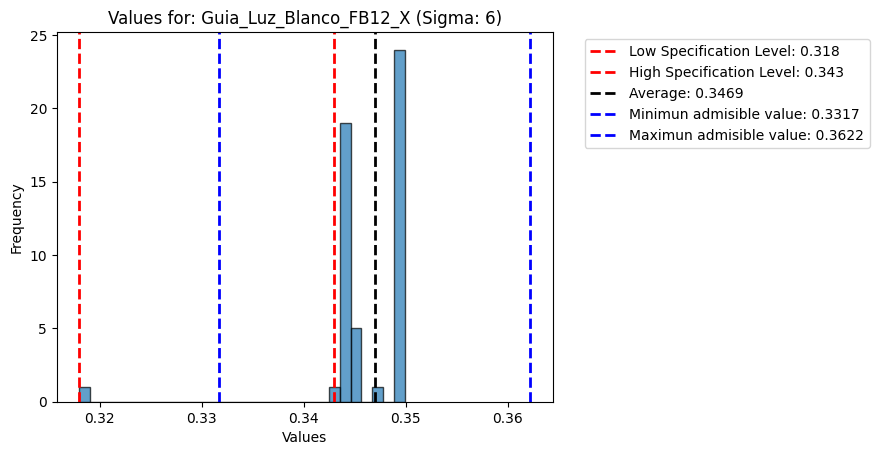

In [6]:
label = "Guia_Luz_Blanco_FB12_X"
plot_capability(rename_index(df), analysis, label, sigma)